In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
df = pd.read_csv(r'Auto.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


https://rdrr.io/cran/ISLR2/man/Auto.html

Auto Data Set
Description

Gas mileage, horsepower, and other information for 392 vehicles.
Usage

Auto

Format

A data frame with 392 observations on the following 9 variables. 

## Problem

Create a binary variable, mpg01, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median.

Explore the data graphically in order to investigate the association
between mpg01 and the other features. Which of the other
features seem most likely to be useful in predicting mpg01? Scatterplots
and boxplots may be useful tools to answer this question.
Describe your findings   

Perform logistic regression on the training data in order to predict
mpg01 using the variables that seemed most associated with
mpg01 in (b)

In [4]:
df['mpg01'] = np.where(df['mpg'] > df['mpg'].median(), 1, 0)

In [5]:
df['mpg01'].value_counts()

mpg01
0    206
1    191
Name: count, dtype: int64

In [6]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors = 'coerce')
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

<Axes: xlabel='mpg01', ylabel='horsepower'>

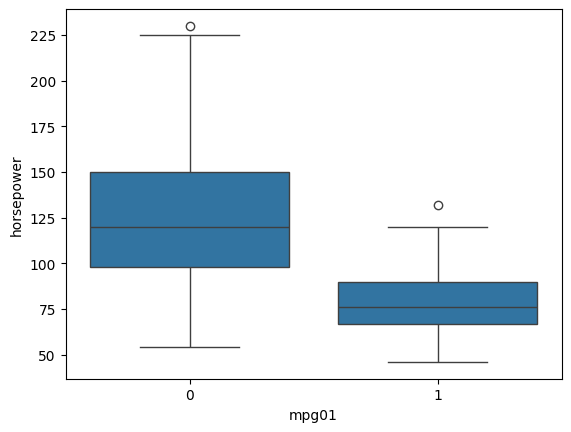

In [7]:
sns.boxplot(df, x = 'mpg01', y = "horsepower")

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']], df['mpg01'], test_size = .30)

In [9]:
X_train = sm.add_constant(df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']])

In [10]:
y_train = df['mpg01']

In [11]:
model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.189595
         Iterations 9


In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  mpg01   No. Observations:                  397
Model:                          Logit   Df Residuals:                      389
Method:                           MLE   Df Model:                            7
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                  0.7262
Time:                        09:51:28   Log-Likelihood:                -75.269
converged:                       True   LL-Null:                       -274.90
Covariance Type:            nonrobust   LLR p-value:                 3.449e-82
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -23.6194      6.143     -3.845      0.000     -35.659     -11.580
cylinders       -0.0644      0.434     -0.148      0.882      -0.916       0.787
displacement    -0.0015      0.013     -0.118      0.906      -0.027       0.024
horsepower      -0.0311      0.022     -1.382      0.167      -0.075       0.013
weight          -0.0050      0.001     -4.155      0.000      -0.007      -0.003
acceleration     0.0192      0.130      0.147      0.883      -0.236       0.275
year             0.5234      0.084      6.217      0.000       0.358       0.688
origin           0.4123      0.351      1.175      0.240      -0.276       1.100
================================================================================

Possibly complete quasi-separation: A fraction 0.17 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [13]:
matrix = X_train.corr()

In [14]:
matrix

,const,cylinders,displacement,horsepower,weight,acceleration,year,origin
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,NaN,1.000000,0.950920,0.839715,0.897017,-0.504061,-0.346717,-0.564972
displacement,NaN,0.950920,1.000000,0.893833,0.933104,-0.544162,-0.369804,-0.610664
horsepower,NaN,0.839715,0.893833,1.000000,0.860581,-0.687039,-0.413022,-0.453962
weight,NaN,0.897017,0.933104,0.860581,1.000000,-0.419502,-0.307900,-0.581265
acceleration,NaN,-0.504061,-0.544162,-0.687039,-0.419502,1.000000,0.282901,0.210084
year,NaN,-0.346717,-0.369804,-0.413022,-0.307900,0.282901,1.000000,0.184314
origin,NaN,-0.564972,-0.610664,-0.453962,-0.581265,0.210084,0.184314,1.000000


In [15]:
X_train = sm.add_constant(df[['cylinders',
       'acceleration', 'year', 'origin']])

In [16]:
model = sm.Logit(y_train, X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.272804
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  mpg01   No. Observations:                  397
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            4
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                  0.6060
Time:                        09:51:28   Log-Likelihood:                -108.30
converged:                       True   LL-Null:                       -274.90
Covariance Type:            nonrobust   LLR p-value:                 7.481e-71
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.5269      4.406     -4.205      0.000     -27.162      -9.892
cylinders       -1.6618      0.204     -8.139      0.000      -2.062      -1.262
acceleration     0.0134      0.076      0.177      0.859      -0.135       0.161
year             0.3378      0.056      6.029      0.000       0.228       0.448
origin           0.5470      0.242      2.261      0.024       0.073       1.021
================================================================================
"""

In [17]:
X_train = sm.add_constant(df[['cylinders', 'year', 'origin']])
model = sm.Logit(y_train, X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.272844
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  mpg01   No. Observations:                  397
Model:                          Logit   Df Residuals:                      393
Method:                           MLE   Df Model:                            3
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                  0.6060
Time:                        09:51:28   Log-Likelihood:                -108.32
converged:                       True   LL-Null:                       -274.90
Covariance Type:            nonrobust   LLR p-value:                 6.624e-72
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.2188      4.036     -4.515      0.000     -26.128     -10.309
cylinders     -1.6655      0.203     -8.203      0.000      -2.063      -1.268
year           0.3370      0.056      6.045      0.000       0.228       0.446
origin         0.5404      0.239      2.262      0.024       0.072       1.009
==============================================================================
"""